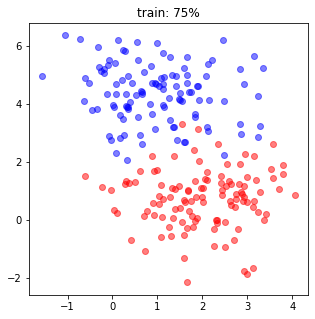

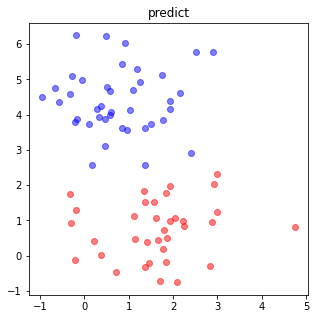

正答率: 96.0%


In [12]:
#=================================================================|1
#							教師あり学習の練習
#========================================================|2021.12.19
# v1: 教師あり学習によるモデル作成

# モジュールの宣言
from sklearn.datasets import make_blobs # データセットの作成
from sklearn.model_selection import train_test_split # 学習・テスト用にデータを分割
from sklearn.metrics import accuracy_score # 学習済みモデルの正答率を測定
from sklearn import svm # 学習モデルを作成するサポートベクターマシン
import pandas as pd # データセットからデータフレームを作成
%matplotlib inline
import matplotlib.pyplot as plt # 描画関数の使用

# データの用意
X, y = make_blobs(
	random_state = 0, # シード値
	n_features = 2, # 特徴量
	centers = 2, # 塊数
	cluster_std = 1, # ばらつき
	n_samples = 300, # サンプル数
)

# 作成したデータを、学習用・テスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# 学習用の特徴量でデータフレームを作成
df = pd.DataFrame(X_train)

# 学習用の分類でtarget列を追加
df["target"] = y_train

# 各々のデータフレームに分類
df0 = df[df["target"] == 0]
df1 = df[df["target"] == 1]

# 散布図として描画
plt.figure(figsize=(5,5))
plt.scatter(df0[0],df0[1],color="b",alpha=0.5)
plt.scatter(df1[0],df1[1],color="r",alpha=0.5)
plt.title("train: 75%")
plt.show()

# サポートベクターマシンで学習モデルを作成
model = svm.SVC()

# 学習用データを渡して学習する
model.fit(X_train, y_train)

# テスト用データで予測を行う
pred = model.predict(X_test)

# テスト用の特徴量でデータフレームを作成
df = pd.DataFrame(X_test)

# テスト用の分類でtarget列を追加
df["target"] = pred

# 各々のデータフレームに分類
df0 = df[df["target"] == 0]
df1 = df[df["target"] == 1]

# 散布図として描画
plt.figure(figsize=(5,5))
plt.scatter(df0[0],df0[1],color="b",alpha=0.5)
plt.scatter(df1[0],df1[1],color="r",alpha=0.5)
plt.title("predict")
plt.show()

# 正答率を調べる
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print(f"正答率: {score * 100}%")